In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import cv2

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/Shareddrives/PDI/sign_data/train/001/"
FILE = "001_01.PNG"

img = cv2.imread(os.path.join(PATH, FILE), cv2.IMREAD_GRAYSCALE)
num_linhas, num_cols = img.shape
print(num_linhas, num_cols)

359 725


In [ ]:
lookupTable = np.zeros(256)
for value in range(0, 256):
    lookupTable[value] = np.log(1+value)


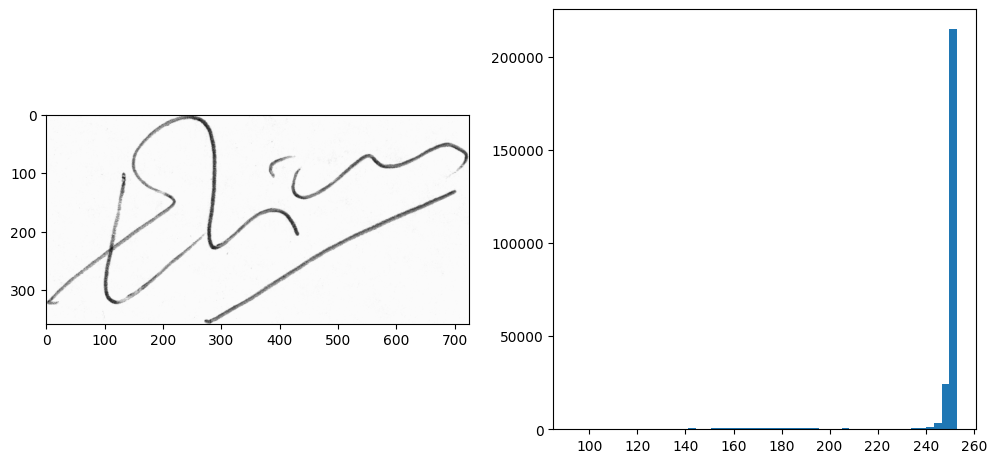

In [ ]:
plt.figure(figsize=[12, 12])

plt.subplot(2, 2, 1)
plt.imshow(img, 'gray')

plt.subplot(2, 2, 2)
_=plt.hist(img.flatten(), 50)


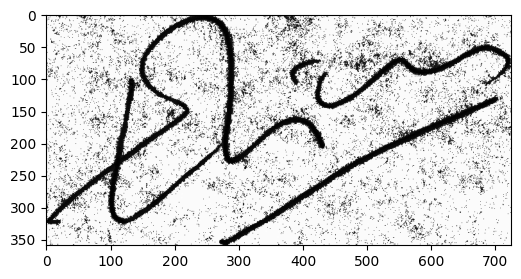

In [ ]:
img_dst = cv2.equalizeHist(img)
plt.figure(figsize=[6,6])
plt.imshow(img_dst, 'gray')


In [ ]:
def gaussian_filter_2d(filter_size):
    # Note que o desvio padrão está sendo definido com base no tamanho do filtro
    sigma = filter_size/6.

    # Definição as coordenadas do matriz
    x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
    y_vals = x_vals.copy()

    # Cria o filtro Gaussino
    z = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        x = x_vals[row]
        for col in range(filter_size):
            y = y_vals[col]
            z[row, col] = np.exp(-(x**2+y**2)/(2*sigma**2))
    z = z/np.sum(z)

    return z

<Figure size 640x480 with 0 Axes>

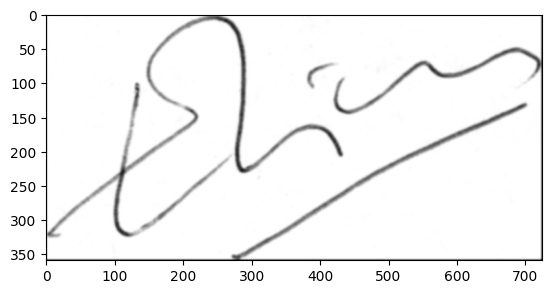

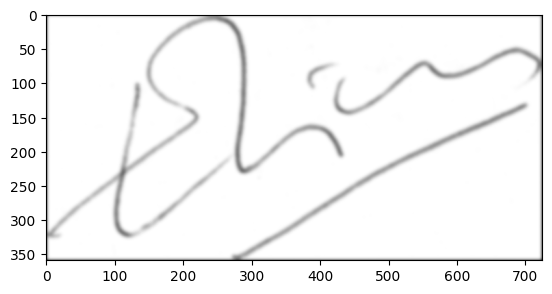

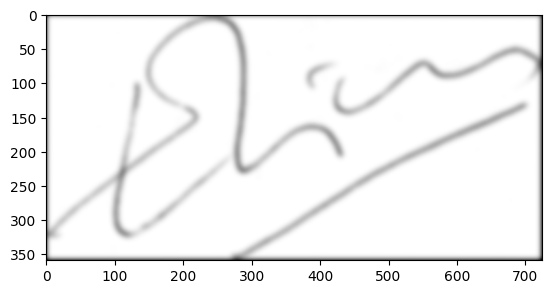

<Figure size 640x480 with 0 Axes>

In [ ]:
import scipy.ndimage

g_3 = gaussian_filter_2d(9)
g_4 = gaussian_filter_2d(16)
g_5 = gaussian_filter_2d(25)

img_filtered_3 = scipy.signal.convolve(img, g_3, mode='same')
img_filtered_4 = scipy.signal.convolve(img, g_4, mode='same')
img_filtered_5 = scipy.signal.convolve(img, g_5, mode='same')



plt.imshow(img_filtered_3, 'gray')
plt.figure()
plt.imshow(img_filtered_4, 'gray')
plt.figure()
plt.imshow(img_filtered_5, 'gray')
plt.figure()

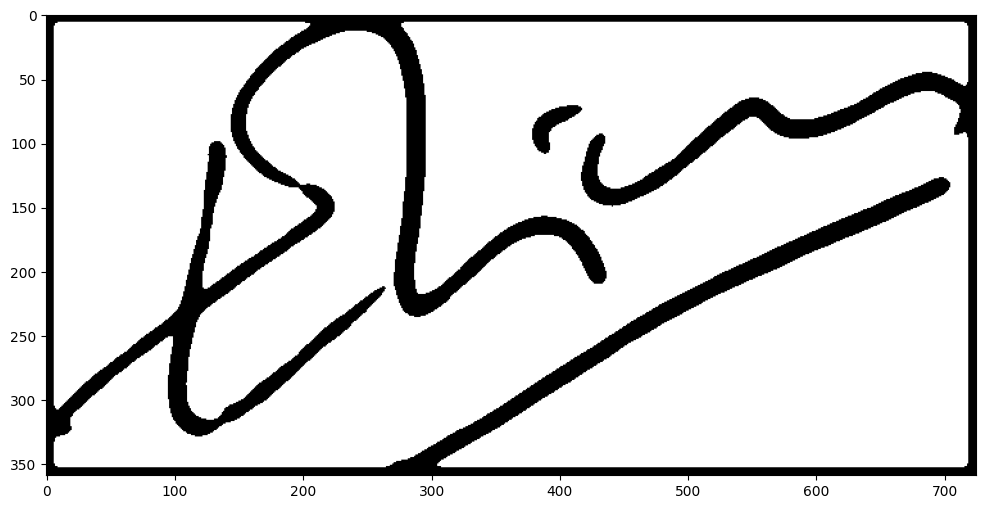

In [ ]:
#img_filtered_t = img_filtered_3>235
#plt.figure(figsize=[12,12])
#plt.imshow(img_filtered_t, 'gray')

#img_filtered_t = img_filtered_4>235
#plt.figure(figsize=[12,12])
#plt.imshow(img_filtered_t, 'gray')

img_filtered_t = img_filtered_5>235
plt.figure(figsize=[12,12])
plt.imshow(img_filtered_t, 'gray')